In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
df = pd.read_csv('housing.csv')

#***EDA***

In [39]:
df.shape

(20640, 10)

In [40]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [43]:
df.duplicated().sum()

np.int64(0)

#***Data Preprocessing***




In [32]:
# drop na values as they are only 207 in 1 col
df = df.dropna(inplace=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

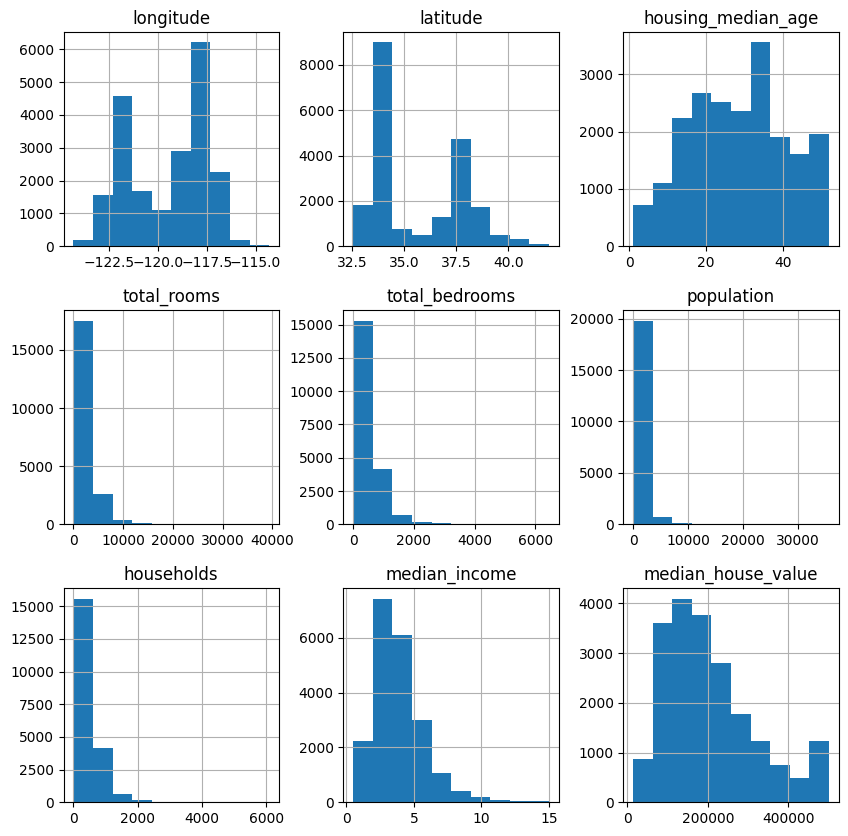

In [44]:
df.hist(figsize=(10, 10))

In [48]:
# ['total_rooms', 'total_bedrooms', 'population', 'households'] skewed to left
skewed_cols = ['total_rooms', 'total_bedrooms', 'population', 'households']

for i in skewed_cols:
  df[i] = np.log(df[i] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

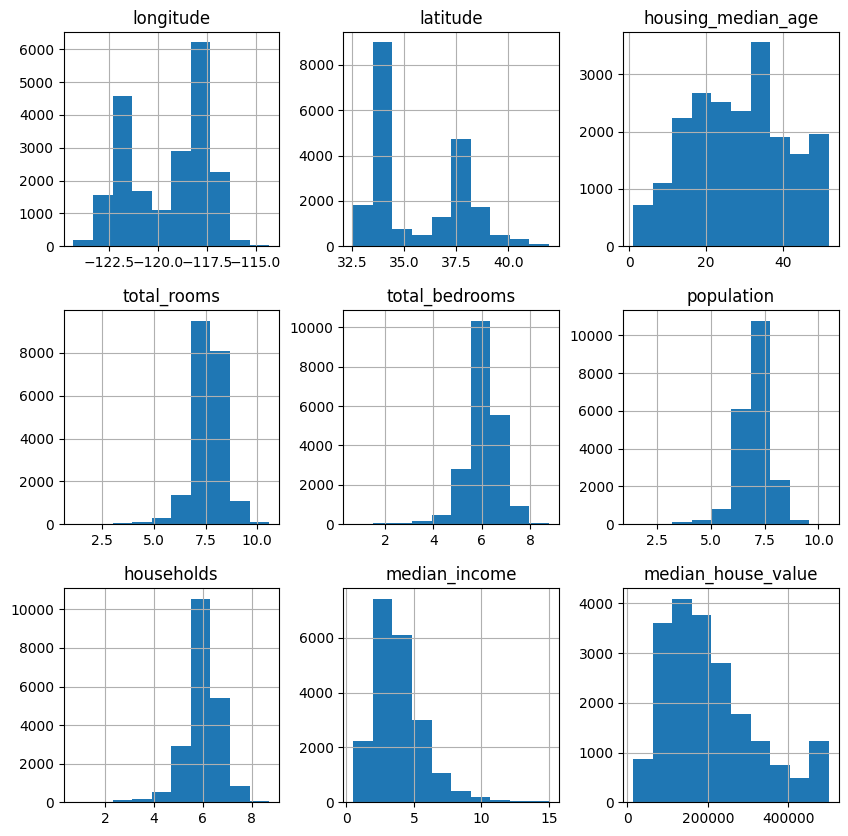

In [49]:
df.hist(figsize=(10, 10))

In [50]:
# One-Hot Encoding 'ocean_proximity' to see it's correlation with target
encoded = pd.get_dummies(df['ocean_proximity'])
df = pd.concat([df, encoded], axis=1)
df.drop('ocean_proximity', axis=1, inplace=True)

<Axes: >

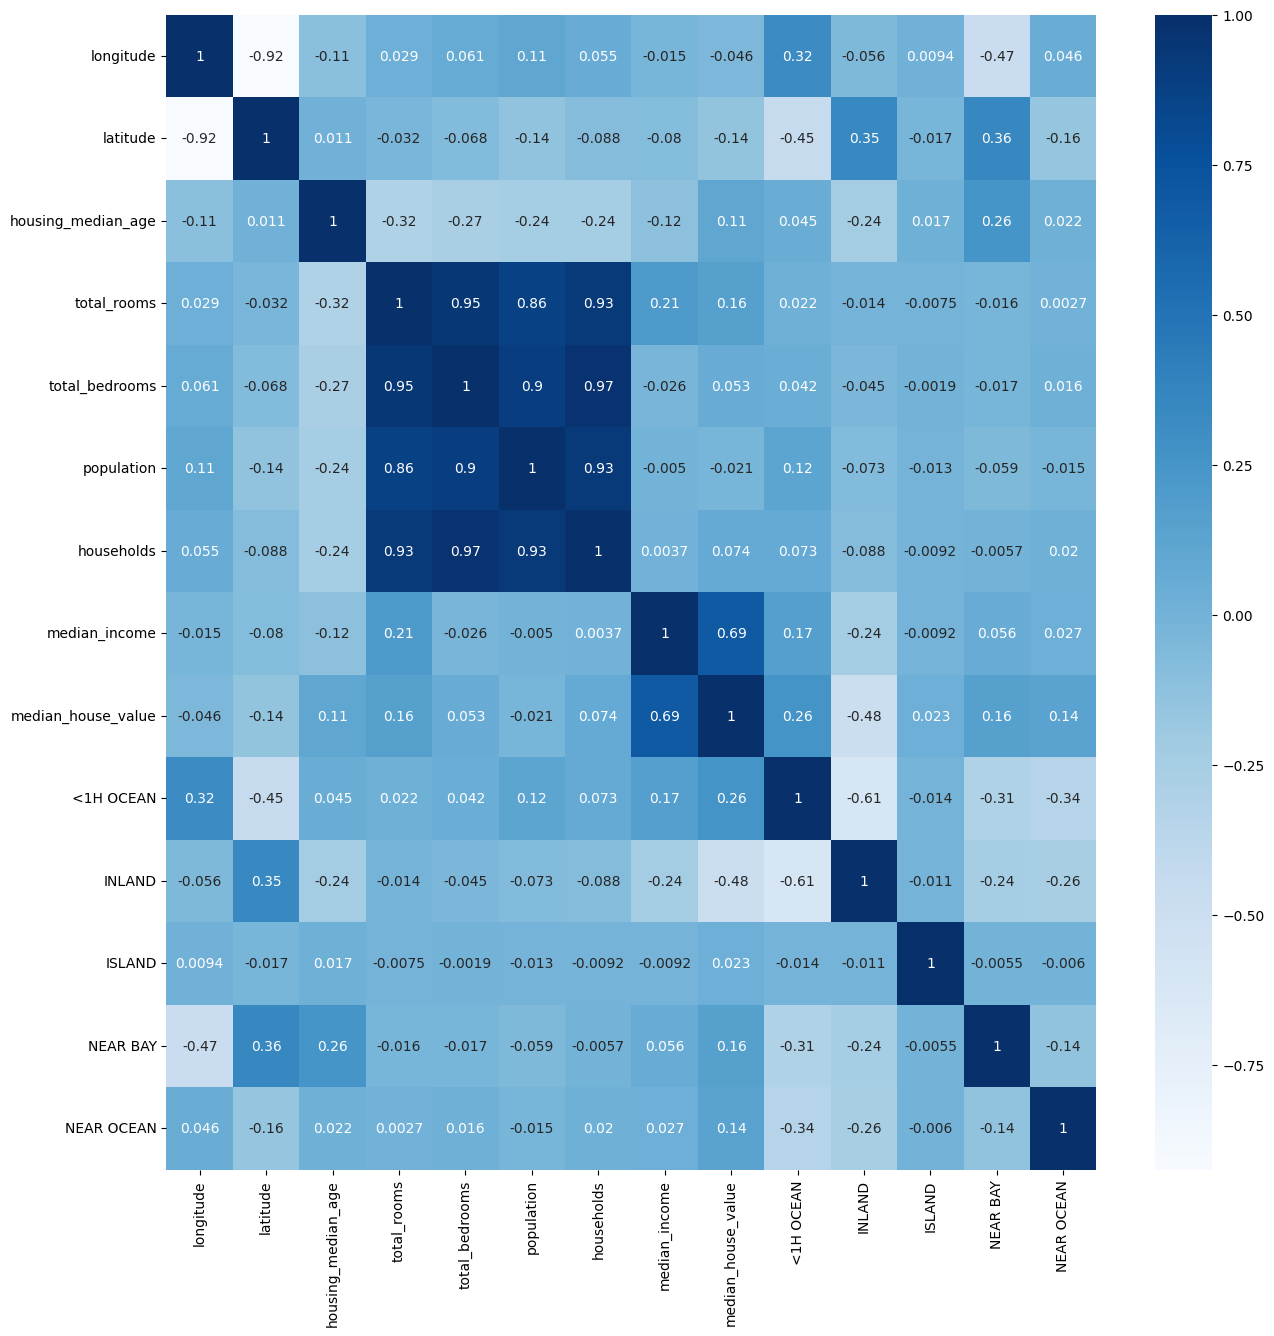

In [56]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

#***Feature Engineering***

In [57]:
df['household_rooms'] = df['total_rooms'] / df['households']

<Axes: >

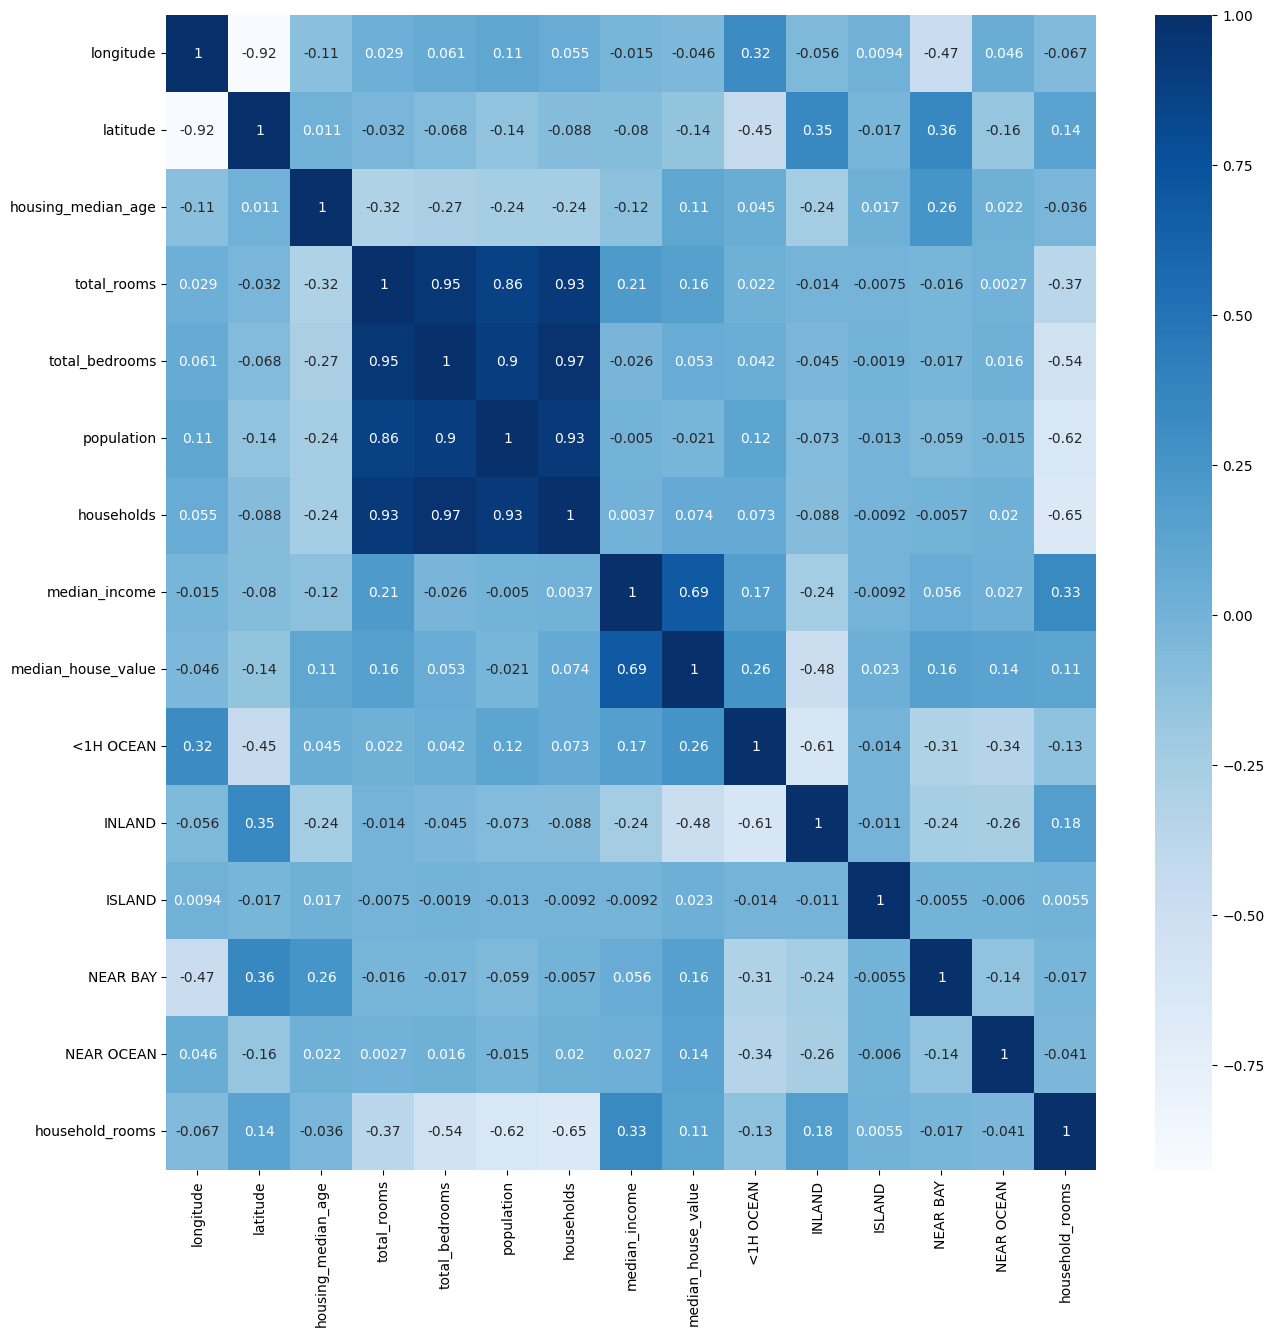

In [58]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

#***Model Training***

In [59]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [63]:
forest = RandomForestRegressor()

In [64]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [65]:
forest.score(x_test, y_test)

0.8159036834365699